<a href="https://colab.research.google.com/github/deepavasanthkumar/deepcodesnippets/blob/master/Spark_Joins_and_Union.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-requisites

In [1]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 198 kB 60.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=6bcd13af6b6e753a6644ec8e9e68277efdf9234c4cf150c8642946d190da8ad9
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [6]:


import pyspark

In [8]:
from pyspark.sql import SparkSession
  
spark = SparkSession.builder.appName("Spark Examples - Union & Joins").getOrCreate()

In [9]:
spark

In [ ]:
import pyspark

In [11]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
data1 = [("James","","Smith","36636","M"),
    ("Michael","Rose","","40288","M"),
    ("Robert","","Williams","42114","M"),
    ("Maria","Anne","Jones","39192","F"),
    ("X-Unknown","Y-Unknown","","X1000","F")
  
  ]

schema1 = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True) 
   
  ])
 
df1 = spark.createDataFrame(data=data1,schema=schema1)
df1.printSchema()
df1.show(truncate=False)

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)

+---------+----------+--------+-----+------+
|firstname|middlename|lastname|id   |gender|
+---------+----------+--------+-----+------+
|James    |          |Smith   |36636|M     |
|Michael  |Rose      |        |40288|M     |
|Robert   |          |Williams|42114|M     |
|Maria    |Anne      |Jones   |39192|F     |
|X-Unknown|Y-Unknown |        |X1000|F     |
+---------+----------+--------+-----+------+



In [12]:
data2 = [("36636","Plus-Two", "77","88","76"),
    ("40288","Plus-Two", "77","88","76"),
    ("42114","Plus-Two", "77","88","76"),
    ("39192","Plus-One", "77","88","76"),
    ("36636","Plus-One", "89","81","71"),
    ("10000","BTech", "89","81","71")
  
  ]

schema2 = StructType([ \
   
    StructField("id", StringType(), True), \
    StructField("CourseName", StringType(), True),
    StructField("Maths Marks",StringType(),True), \
    StructField("Electronics Marks",StringType(),True), \
    StructField("Computer Science",StringType(),True)   
  ])
 
df2 = spark.createDataFrame(data=data2,schema=schema2)
df2.printSchema()
df2.show(truncate=False)

root
 |-- id: string (nullable = true)
 |-- CourseName: string (nullable = true)
 |-- Maths Marks: string (nullable = true)
 |-- Electronics Marks: string (nullable = true)
 |-- Computer Science: string (nullable = true)

+-----+----------+-----------+-----------------+----------------+
|id   |CourseName|Maths Marks|Electronics Marks|Computer Science|
+-----+----------+-----------+-----------------+----------------+
|36636|Plus-Two  |77         |88               |76              |
|40288|Plus-Two  |77         |88               |76              |
|42114|Plus-Two  |77         |88               |76              |
|39192|Plus-One  |77         |88               |76              |
|36636|Plus-One  |89         |81               |71              |
|10000|BTech     |89         |81               |71              |
+-----+----------+-----------+-----------------+----------------+



#InnerJoin

InnerJoin with the column resulting in the common records matching in both dataframe

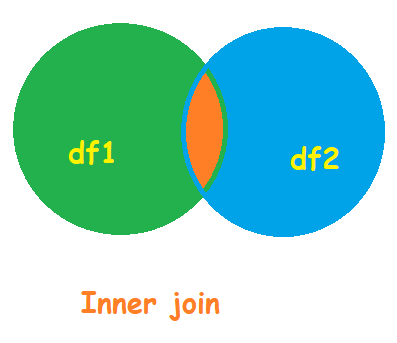

In [ ]:
df1.join(df2,df1.id ==  df2.id,"inner").show(truncate=False)

+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|firstname|middlename|lastname|id   |gender|id   |CourseName|Maths Marks|Electronics Marks|Computer Science|
+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|James    |          |Smith   |36636|M     |36636|Plus-Two  |77         |88               |76              |
|James    |          |Smith   |36636|M     |36636|Plus-One  |89         |81               |71              |
|Maria    |Anne      |Jones   |39192|F     |39192|Plus-One  |77         |88               |76              |
|Michael  |Rose      |        |40288|M     |40288|Plus-Two  |77         |88               |76              |
|Robert   |          |Williams|42114|M     |42114|Plus-Two  |77         |88               |76              |
+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+



#Left Join

 The LEFT JOIN returns all rows from the left dataframe and the matching rows from the right dataframe. If no matching rows are found in the right, null are used.

 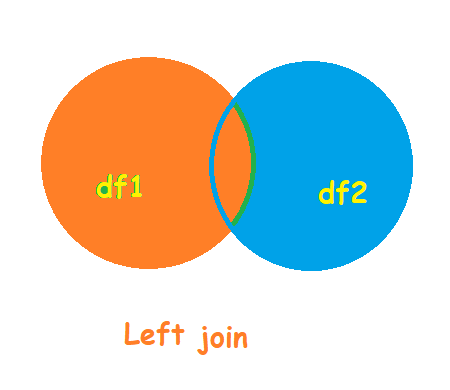

In [15]:
df1.join(df2,df1.id ==  df2.id,"left").show(truncate=False)

+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|firstname|middlename|lastname|id   |gender|id   |CourseName|Maths Marks|Electronics Marks|Computer Science|
+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|James    |          |Smith   |36636|M     |36636|Plus-Two  |77         |88               |76              |
|James    |          |Smith   |36636|M     |36636|Plus-One  |89         |81               |71              |
|Maria    |Anne      |Jones   |39192|F     |39192|Plus-One  |77         |88               |76              |
|Michael  |Rose      |        |40288|M     |40288|Plus-Two  |77         |88               |76              |
|Robert   |          |Williams|42114|M     |42114|Plus-Two  |77         |88               |76              |
|X-Unknown|Y-Unknown |        |X1000|F     |null |null      |null       |null             |null            |
+---------+--------

#Right Join
The RIGHT JOIN returns all rows from the right dataframe and the matching rows from the left dataframe. If no matching rows are found in the left, null are used.

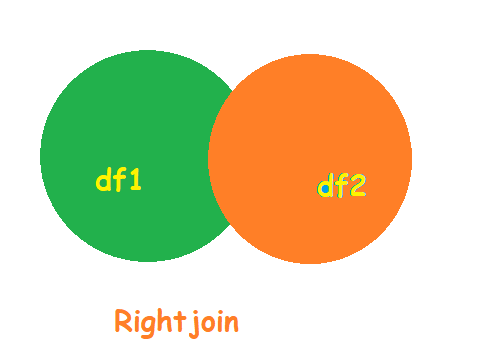

In [16]:
df1.join(df2,df1.id ==  df2.id,"right").show(truncate=False)

+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|firstname|middlename|lastname|id   |gender|id   |CourseName|Maths Marks|Electronics Marks|Computer Science|
+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|null     |null      |null    |null |null  |10000|BTech     |89         |81               |71              |
|James    |          |Smith   |36636|M     |36636|Plus-Two  |77         |88               |76              |
|James    |          |Smith   |36636|M     |36636|Plus-One  |89         |81               |71              |
|Maria    |Anne      |Jones   |39192|F     |39192|Plus-One  |77         |88               |76              |
|Michael  |Rose      |        |40288|M     |40288|Plus-Two  |77         |88               |76              |
|Robert   |          |Williams|42114|M     |42114|Plus-Two  |77         |88               |76              |
+---------+--------

#OUTER

In an outer join, unmatched rows in one or both tables can be returned.

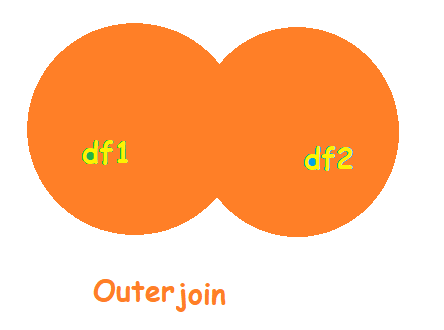

In [17]:
df1.join(df2,df1.id ==  df2.id,"outer").show(truncate=False)

+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|firstname|middlename|lastname|id   |gender|id   |CourseName|Maths Marks|Electronics Marks|Computer Science|
+---------+----------+--------+-----+------+-----+----------+-----------+-----------------+----------------+
|null     |null      |null    |null |null  |10000|BTech     |89         |81               |71              |
|James    |          |Smith   |36636|M     |36636|Plus-Two  |77         |88               |76              |
|James    |          |Smith   |36636|M     |36636|Plus-One  |89         |81               |71              |
|Maria    |Anne      |Jones   |39192|F     |39192|Plus-One  |77         |88               |76              |
|Michael  |Rose      |        |40288|M     |40288|Plus-Two  |77         |88               |76              |
|Robert   |          |Williams|42114|M     |42114|Plus-Two  |77         |88               |76              |
|X-Unknown|Y-Unknow

#unionByName 
 built-in option available in spark which is available from spark 2.3.0.

with spark version 3.1.0, there is **allowMissingColumns** option with the default value set to False to handle missing columns. Even if both dataframes don't have the same set of columns, this function will work, setting missing column values to null in the resulting dataframe.

In [13]:
df1.unionByName(df2, allowMissingColumns=True).show()

+---------+----------+--------+-----+------+----------+-----------+-----------------+----------------+
|firstname|middlename|lastname|   id|gender|CourseName|Maths Marks|Electronics Marks|Computer Science|
+---------+----------+--------+-----+------+----------+-----------+-----------------+----------------+
|    James|          |   Smith|36636|     M|      null|       null|             null|            null|
|  Michael|      Rose|        |40288|     M|      null|       null|             null|            null|
|   Robert|          |Williams|42114|     M|      null|       null|             null|            null|
|    Maria|      Anne|   Jones|39192|     F|      null|       null|             null|            null|
|X-Unknown| Y-Unknown|        |X1000|     F|      null|       null|             null|            null|
|     null|      null|    null|36636|  null|  Plus-Two|         77|               88|              76|
|     null|      null|    null|40288|  null|  Plus-Two|         77|      

#union 



In [19]:
df1.union(df1).show()

+---------+----------+--------+-----+------+
|firstname|middlename|lastname|   id|gender|
+---------+----------+--------+-----+------+
|    James|          |   Smith|36636|     M|
|  Michael|      Rose|        |40288|     M|
|   Robert|          |Williams|42114|     M|
|    Maria|      Anne|   Jones|39192|     F|
|X-Unknown| Y-Unknown|        |X1000|     F|
|    James|          |   Smith|36636|     M|
|  Michael|      Rose|        |40288|     M|
|   Robert|          |Williams|42114|     M|
|    Maria|      Anne|   Jones|39192|     F|
|X-Unknown| Y-Unknown|        |X1000|     F|
+---------+----------+--------+-----+------+



Another Join - combining all columns of both dataframes and substituing F.lit(none) for null values in another dataframe

In [14]:
from pyspark.sql import functions as F
def appendDataFrames(df1,df2):
    list1 = df1.columns
    list2 = df2.columns
    for col in list2:
        if(col not in list1):
            df1 = df1.withColumn(col, F.lit(None))
    for col in list1:
        if(col not in list2):
            df2 = df2.withColumn(col, F.lit(None))
    return df1.unionByName(df2)

df3=appendDataFrames(df1,df2)
df3.show()

+---------+----------+--------+-----+------+----------+-----------+-----------------+----------------+
|firstname|middlename|lastname|   id|gender|CourseName|Maths Marks|Electronics Marks|Computer Science|
+---------+----------+--------+-----+------+----------+-----------+-----------------+----------------+
|    James|          |   Smith|36636|     M|      null|       null|             null|            null|
|  Michael|      Rose|        |40288|     M|      null|       null|             null|            null|
|   Robert|          |Williams|42114|     M|      null|       null|             null|            null|
|    Maria|      Anne|   Jones|39192|     F|      null|       null|             null|            null|
|X-Unknown| Y-Unknown|        |X1000|     F|      null|       null|             null|            null|
|     null|      null|    null|36636|  null|  Plus-Two|         77|               88|              76|
|     null|      null|    null|40288|  null|  Plus-Two|         77|      